In [262]:
import kagglehub
import skew
from kagglehub import KaggleDatasetAdapter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [263]:
projectData = pd.read_csv(r'C:\Users\barto\PycharmProjects\Statystyka\Video_Games_Sales_as_at_22_Dec_2016.csv')

In [264]:
projectData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [265]:
projectData.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:
selected_columns=['Name', 'Platform', 'Publisher', 'Global_Sales', 'Critic_Score', 'User_Score','Year_of_Release']
projectData_selected=projectData[selected_columns]
projectData_cleaned=projectData_selected.dropna()
projectData_cleaned.head()



,Name,Platform,Publisher,Global_Sales,Critic_Score,User_Score,Year_of_Release
0,Wii Sports,Wii,Nintendo,82.53,76.0,8,2006.0
2,Mario Kart Wii,Wii,Nintendo,35.52,82.0,8.3,2008.0
3,Wii Sports Resort,Wii,Nintendo,32.77,80.0,8,2009.0
6,New Super Mario Bros.,DS,Nintendo,29.80,89.0,8.5,2006.0
7,Wii Play,Wii,Nintendo,28.92,58.0,6.6,2006.0


Okreslony typ zmiennej i typ skali pomiarowej dla wybranych kolumn

1.Platform (np. PS4, Xbox360)

-Typ zmiennej:Zmienna jakościowa

-Skala pomiarowa: Skala nominalna

2.Publisher (np. Ubisoft, Electronic Arts)

-Typ zmiennej: Zmienna jakościowa

-Skala pomiarowa: Skala nominalna

3.Global_Sales (sprzedaz globalna w milionach egzemplarzy)

-Typ zmiennej: Zmienna ilościowa

-Skala pomiarowa: Skala ilorazowa

4.Critic_Score (ocena krytykow w skali od 1-100)

-Typ zmiennej: Zmienna ilościowa

-pomiarowa: Skala przedziałowa

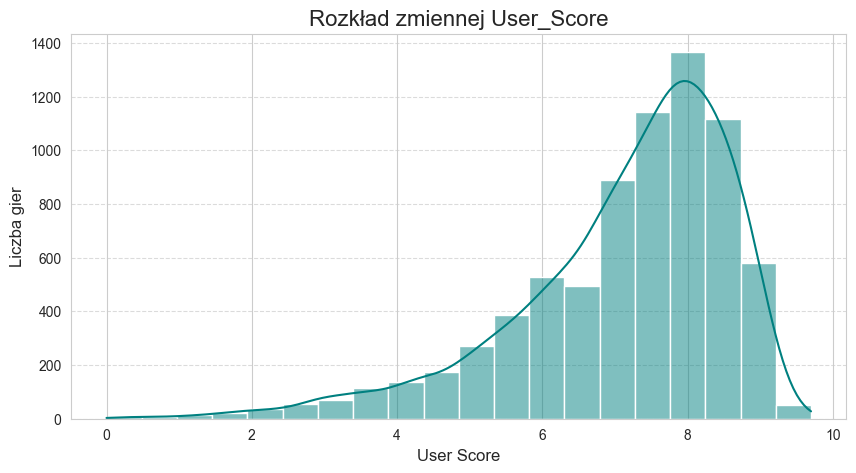

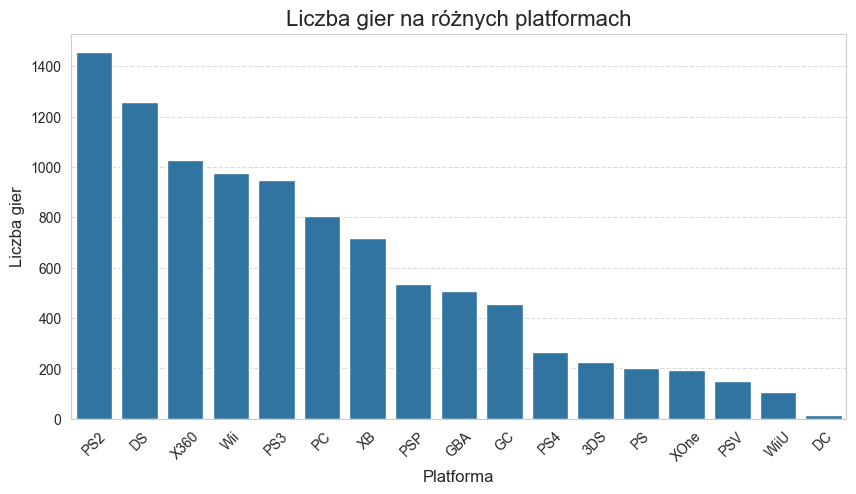

In [267]:
selected_columns = ['Name', 'Platform', 'User_Score', 'Year_of_Release']
projectData_cleaned = projectData[selected_columns].dropna()
projectData_cleaned['User_Score'] = pd.to_numeric(projectData_cleaned['User_Score'], errors='coerce')

# Histogram dla User_Score
plt.figure(figsize=(10, 5))
sns.histplot(data=projectData_cleaned, x='User_Score', bins=20, kde=True, color='teal')
plt.title('Rozkład zmiennej User_Score', fontsize=16)
plt.xlabel('User Score', fontsize=12)
plt.ylabel('Liczba gier', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Wykres słupkowy Platform
plt.figure(figsize=(10, 5))
platform_counts = projectData_cleaned['Platform'].value_counts()
sns.barplot(x=platform_counts.index, y=platform_counts.values)
plt.title('Liczba gier na różnych platformach', fontsize=16)
plt.xlabel('Platforma', fontsize=12)
plt.ylabel('Liczba gier', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


-Większość gier otrzymuje oceny użytkowników w przedziale 6-8/10, co wskazuje na ogólne zadowolenie graczy.


-Nieliczne gry mają skrajnie niskie (0-2) lub bardzo wysokie (9-10) oceny.


-Użytkownicy są skłonni wystawiać umiarkowanie pozytywne oceny, co może wynikać z subiektywnego charakteru ocen.

Rozkład częstości w grupach User_Score:
User_Score_Group
0-2       58
2-4      308
4-6     1126
6-8     3712
8-10    2259
Name: count, dtype: int64


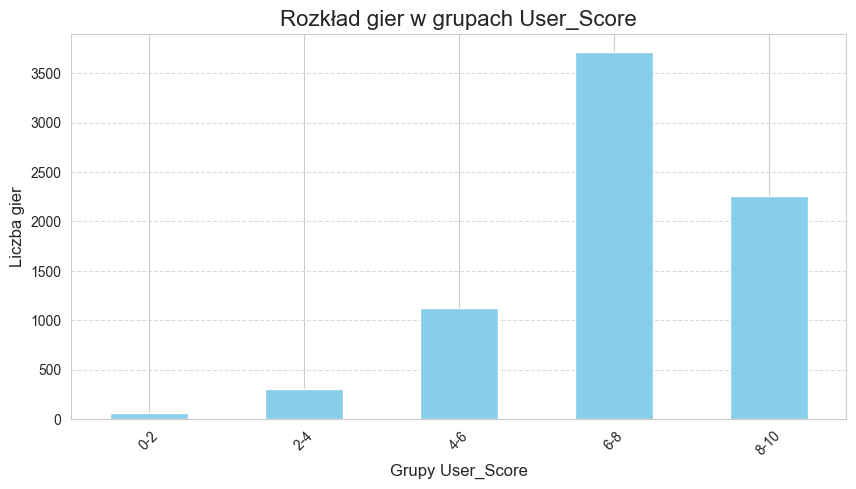

In [268]:
# Określenie przedziałów dla grupowania User_Score
bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10']
projectData_cleaned['User_Score_Group'] = pd.cut(projectData_cleaned['User_Score'], bins=bins, labels=labels,
                                                 include_lowest=True)


grouped_data = projectData_cleaned['User_Score_Group'].value_counts().sort_index()


print("Rozkład częstości w grupach User_Score:")
print(grouped_data)


plt.figure(figsize=(10, 5))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Rozkład gier w grupach User_Score', fontsize=16)
plt.xlabel('Grupy User_Score', fontsize=12)
plt.ylabel('Liczba gier', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [269]:
columns = ['Global_Sales', 'Critic_Score', 'User_Score']
projectData_cleaned = projectData[columns].dropna()


projectData_cleaned['User_Score'] = pd.to_numeric(projectData_cleaned['User_Score'], errors='coerce')

# Obliczenie miar
summary = pd.DataFrame({
    'Średnia': projectData_cleaned.mean(),  # Średnia
    'Mediana': projectData_cleaned.median(),  # Mediana
    'Dominanta': projectData_cleaned.mode().iloc[0],  # Dominanta
    'Wariancja': projectData_cleaned.var(),  # Wariancja
    'Odchylenie standardowe': projectData_cleaned.std(),  # Odchylenie standardowe
    'Rozstęp': projectData_cleaned.max() - projectData_cleaned.min(),  # Rozstęp
    'Odchylenie ćwiartkowe': projectData_cleaned.quantile(0.75) - projectData_cleaned.quantile(0.25),  # IQR
    'Współczynnik zmienności (%)': (projectData_cleaned.std() / projectData_cleaned.mean()) * 100  # CV
})


quartiles = projectData_cleaned.quantile([0.25, 0.5, 0.75]).T
quartiles.columns = ['Q1 (25%)', 'Q2 (Mediana)', 'Q3 (75%)']


final_summary = pd.concat([summary, quartiles], axis=1)

# Wyświetlenie wyników
print("Miary centralne i miary rozrzutu dla analizowanych zmiennych:")
print(final_summary)


Miary centralne i miary rozrzutu dla analizowanych zmiennych:
                Średnia  Mediana  Dominanta   Wariancja  \
Global_Sales   0.690293     0.25       0.02    3.310727   
Critic_Score  68.975553    71.00      70.00  194.184633   
User_Score     7.182428     7.50       7.80    2.077176   

              Odchylenie standardowe  Rozstęp  Odchylenie ćwiartkowe  \
Global_Sales                1.819540    82.52                   0.55   
Critic_Score               13.935015    85.00                  19.00   
User_Score                  1.441241     9.10                   1.70   

              Współczynnik zmienności (%)  Q1 (25%)  Q2 (Mediana)  Q3 (75%)  
Global_Sales                   263.589705       0.1          0.25      0.65  
Critic_Score                    20.202831      60.0         71.00     79.00  
User_Score                      20.066207       6.5          7.50      8.20  


 Wnioski z otrzymanych danych:
1. Global_Sales (globalna sprzedaż):
    - Średnia sprzedaż wynosi około 0.69 mln sztuk, ale mediana to 0.25, co wskazuje, że większość gier osiąga znacznie niższe wyniki sprzedaży niż sugeruje średnia.
    - Dominanta to 0.02 mln sztuk, co oznacza, że najczęściej sprzedawana liczba kopii to bardzo niskie wartości sprzedaży.
    - Rozstęp wynoszący 82.52 mln sztuk oraz współczynnik zmienności na poziomie 263.59% wskazują na bardzo duże zróżnicowanie wyników sprzedażowych wśród gier.
    - Odchylenie ćwiartkowe na poziomie 0.55 pokazuje, że 50% centralnych wyników (między Q1 a Q3) ma mniejsza zmienność w porównaniu do całkowitego rozstępu.

2. Critic_Score (ocena krytyków):
    - Średnia ocena wynosi około 69, a mediana to 71 – większość gier otrzymuje umiarkowanie pozytywne oceny.
    - Dominanta to 70, co oznacza, że taka ocena jest wystawiana najczęściej.
    - Rozstęp wynoszący 85 punktów oraz odchylenie standardowe na poziomie 13.93 wskazują na dość szeroki zakres ocen, ale ich zmienność (wyrażona współczynnikiem zmienności 20.2%) jest stosunkowo niska.
    - Odchylenie ćwiartkowe wynosi 19, co oznacza, że centralne 50% gier (między Q1 = 60 a Q3 = 79) mieści się w tym przedziale ocen.

3. User_Score (ocena użytkowników):
    - Średnia ocena użytkowników to 7.18, a mediana (7.50) oraz dominanta (7.80) wskazują na to, że większość gier cieszy się dobrą opinią wśród graczy.
    - Rozstęp wynosi 9.10, co wskazuje na pewną różnorodność ocen, ale odchylenie standardowe (1.44) oraz współczynnik zmienności (20.07%) wskazują na stosunkową jednorodność wyników w tej kategorii.
    - Odchylenie ćwiartkowe to 1.70, a centralne 50% ocen mieści się w zakresie między 6.5 a 8.2, co również potwierdza względną stabilność opinii graczy.

In [270]:
projectData_cleaned['User_Score'] = pd.to_numeric(projectData_cleaned['User_Score'], errors='coerce')

# Obliczanie miar asymetrii i kurtozy
asymmetry_kurtosis = pd.DataFrame({
    'Asymetria (skewness)': projectData_cleaned.skew(),
    'Kurtoza (kurtosis)': projectData_cleaned.kurt()
})

# Wyświetlenie wyników
print("Miary asymetrii i koncentracji dla analizowanych zmiennych:")
print(asymmetry_kurtosis)


Miary asymetrii i koncentracji dla analizowanych zmiennych:
              Asymetria (skewness)  Kurtoza (kurtosis)
Global_Sales             17.182206          577.923286
Critic_Score             -0.615675            0.147442
User_Score               -1.218593            1.602901


Global_Sales
- Asymetria (Skewness): 17.182206
    - Rozkład danych jest znacznie asymetryczny w prawo.
    - Oznacza to, że większość wartości jest skupiona w niższym zakresie, a tylko niewielka liczba obserwacji ma bardzo wysokie wartości (Global_Sales zawiera pojedyncze gry o ogromnych wynikach sprzedaży globalnej, co wypycha „ogon” rozkładu w prawo).

- Kurtoza (Kurtosis): 577.923286
    - Bardzo wysoka wartość kurtozy wskazuje na rozkład o bardzo ostrym szczycie i długich ogonach. Oznacza to, że w danych występuje kilka ekstremalnych wartości, co jest typowe dla danych o sprzedaży globalnej w branży gier.

Podsumowanie: Rozkład Global_Sales jest skrajnie niesymetryczny, z dominującą większością małych wartości i kilkoma bardzo wysokimi wynikami.
Critic_Score
- Asymetria (Skewness): -0.615675
    - Rozkład jest asymetryczny w lewo, ale asymetria nie jest bardzo silna.
    - Większość gier ma względnie wysokie oceny krytyków (prawa strona rozkładu jest mocniej wypełniona), natomiast wartości niskie są mniej liczne.

- Kurtoza (Kurtosis): 0.147442
    - Kurtoza oscyluje w pobliżu 0, co oznacza, że rozkład danych jest zbliżony do normalnego .

Podsumowanie: Critic_Score ma lekko spłaszczony rozkład i niewielką asymetrię w lewo, co jest charakterystyczne dla danych, gdzie wyniki są umiarkowanie wyrównane (większość gier ma podobne, nieekstremalne oceny).
 User_Score
- Asymetria (Skewness): -1.218593
    - Rozkład jest asymetryczny w lewo, co oznacza, że większość użytkowników daje gry o wysokich wartościach ocen (prawa strona rozkładu), natomiast niskie oceny (lewa strona) zdarzają się rzadziej.

- Kurtoza (Kurtosis): 1.602901
    - Kurtoza powyżej 0 oznacza, że dane są nieco bardziej skupione wokół wartości średniej, ale występują również grubsze "ogony".

Podsumowanie: Rozkład User_Score wskazuje na to, że użytkownicy częściej zostawiają pozytywne oceny (wysokie), a negatywne oceny występują mniej regularnie. Istnieje też pewna liczba skrajnych wartości.



In [271]:
projectData_cleaned=projectData_selected.dropna()
sorted_games = projectData_cleaned.sort_values(by='Year_of_Release', ascending=False)

# Pobranie 50 najnowszych gier
top_50_latest_games = sorted_games.head(50)

# Wyświetlenie wyników
print('50 najnowszych gier:')
print(top_50_latest_games)

asc_sorted_games = projectData_cleaned.sort_values(by='Year_of_Release', ascending=True)

top_50_oldest_games = sorted_games.head(50)
print('--------------------------------------------------------------------------------------------------------------')
print('50 najstarszych gier:')
print(top_50_oldest_games)



50 najnowszych gier:
                                            Name Platform  \
4676                        Farming Simulator 17      PS4   
16656                           Fast Racing Neo      WiiU   
16634                   Sébastien Loeb Rally Evo     XOne   
16664                           Prison Architect     XOne   
16503      Sherlock Holmes: The Devil's Daughter      PS4   
4033        Plants vs. Zombies: Garden Warfare 2      PS4   
16112                  Valentino Rossi: The Game       PC   
16317                Prototype: Biohazard Bundle     XOne   
16325          Agatha Christie's The ABC Murders     XOne   
16340                      Battle Worlds: Kronos       PC   
94                                       FIFA 17      PS4   
16396                             Goat Simulator     XOne   
16190            Darksiders: Warmastered Edition     XOne   
16203                           The Technomancer       PC   
9794                       Robinson: The Journey      PS4   
201

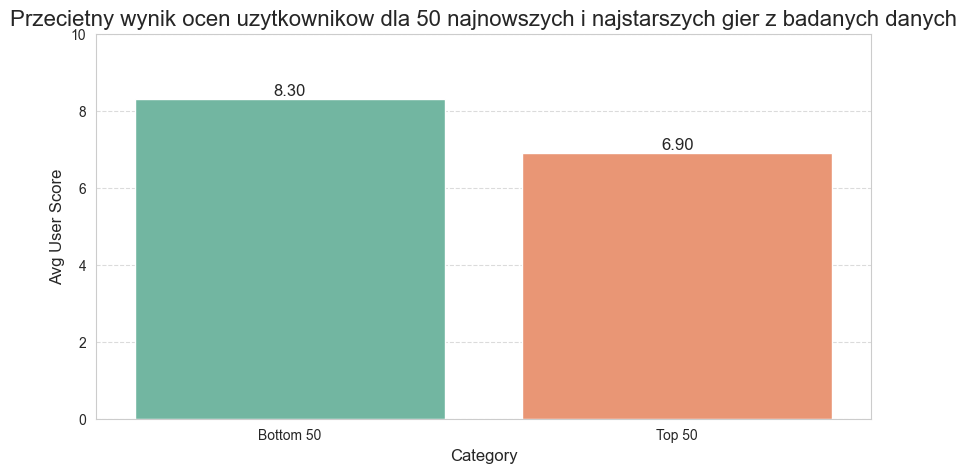

In [272]:

top_50_latest_games.loc[:, 'User_Score'] = pd.to_numeric(top_50_latest_games['User_Score'], errors='coerce')
sorted_games.loc[:, 'User_Score'] = pd.to_numeric(sorted_games['User_Score'], errors='coerce')


comparison_data = pd.DataFrame({
    'Category': ['Top 50'] * len(top_50_latest_games) + ['Bottom 50'] * len(sorted_games.tail(50)),
    'User_Score': pd.concat([
        top_50_latest_games['User_Score'],
        sorted_games.tail(50)['User_Score']
    ])
})

# Grupowanie danych po kategorii i liczenie średniej
average_scores = comparison_data.groupby('Category')['User_Score'].mean().reset_index()


plt.figure(figsize=(10, 5))
sns.barplot(
    data=average_scores,
    x='Category',
    y='User_Score',
    hue='Category',
    dodge=False,
    palette='Set2'
)


for index, row in average_scores.iterrows():
    plt.text(index, row['User_Score'] + 0.1, f"{row['User_Score']:.2f}", ha='center', fontsize=12)


plt.title('Przecietny wynik ocen uzytkownikow dla 50 najnowszych i najstarszych gier z badanych danych', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Avg User Score', fontsize=12)
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)


- Najnowsze gry  mają średnią ocenę 8.30, podczas gdy najstarsze 6.90.

- Współczesne gry są lepiej oceniane, co może wynikać z poprawy jakości produkcji lub zmiany preferencji użytkowników.

In [273]:

#liczenie zakresu czasu
max_year=projectData_cleaned['Year_of_Release'].max()
min_year=projectData_cleaned['Year_of_Release'].min()
print(max_year)
print(min_year)
year_diff=max_year-min_year
print(year_diff)

2016.0
1985.0
31.0


C:\Users\barto\AppData\Local\Temp\ipykernel_30396\904530481.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


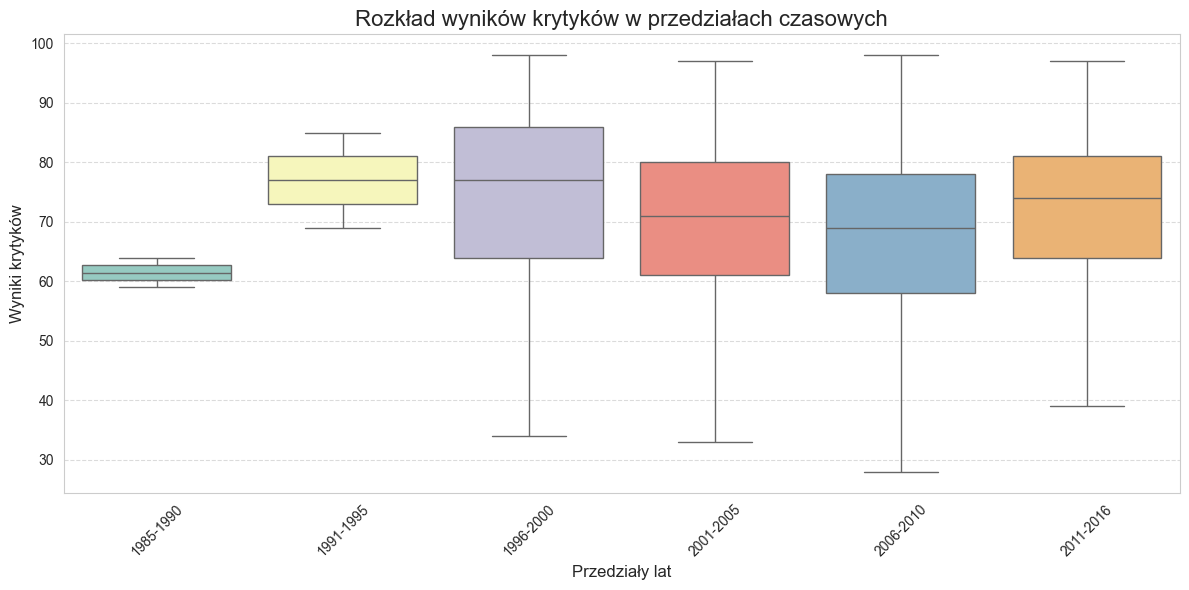

In [274]:
projectData_cleaned = projectData_selected.dropna(subset=['Year_of_Release', 'Critic_Score']).copy()


bins = [1984, 1990, 1995, 2000, 2005, 2010, 2016]
labels = ['1985-1990', '1991-1995', '1996-2000', '2001-2005', '2006-2010', '2011-2016']


projectData_cleaned['Year_Group'] = pd.cut(projectData_cleaned['Year_of_Release'], bins=bins, labels=labels)

# Tworzenie wykresu pudełkowego
plt.figure(figsize=(12, 6))  #
sns.set_style("whitegrid")

sns.boxplot(
    data=projectData_cleaned,
    x='Year_Group',
    y='Critic_Score',
    palette='Set3',
    showfliers=False
)


plt.title('Rozkład wyników krytyków w przedziałach czasowych', fontsize=16)
plt.xlabel('Przedziały lat', fontsize=12)
plt.ylabel('Wyniki krytyków', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

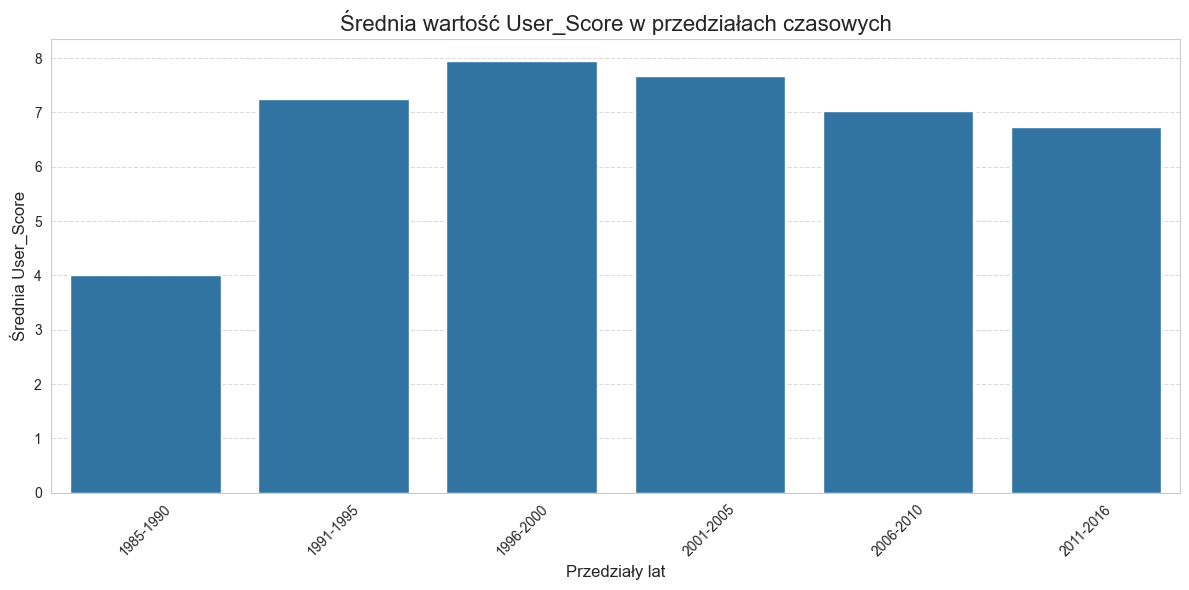

In [275]:
projectData_cleaned['User_Score'] = pd.to_numeric(projectData_cleaned['User_Score'], errors='coerce')

#  przedziały lat
bins = [1984, 1990, 1995, 2000, 2005, 2010, 2016]
labels = ['1985-1990', '1991-1995', '1996-2000', '2001-2005', '2006-2010', '2011-2016']

projectData_cleaned['Year_Group'] = pd.cut(projectData_cleaned['Year_of_Release'], bins=bins, labels=labels)

# Obliczanie średniego User_Score dla każdego przedziału
user_score_avg = projectData_cleaned.groupby('Year_Group', observed=False)['User_Score'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.barplot(
    data=user_score_avg,
    x='Year_Group',
    y='User_Score',
)

plt.title('Średnia wartość User_Score w przedziałach czasowych', fontsize=16)
plt.xlabel('Przedziały lat', fontsize=12)
plt.ylabel('Średnia User_Score', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


- Średnia ocena użytkowników (User_Score) wzrosła z ~6.5 w latach 1985-1990 do ~7.5 w latach 2011-2016.

- Poprawa ocen może wynikac rozwoju technologii i lepsze dopasowanie gier do oczekiwań

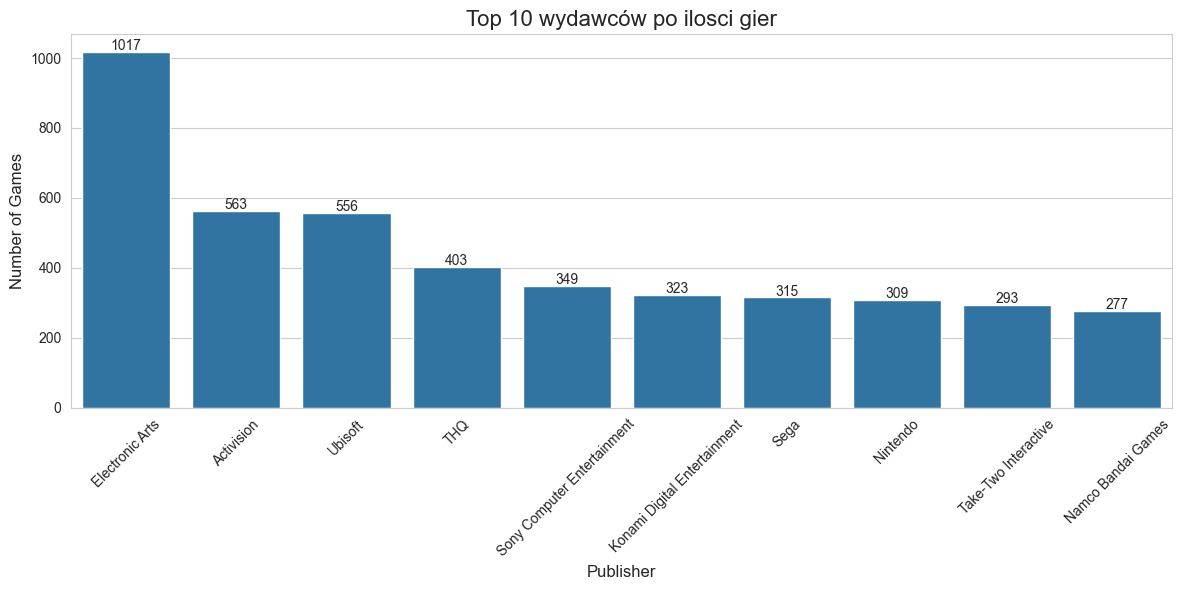

In [276]:
# Grupowanie po wydawcach i zliczanie liczby gier dla każdego wydawcy
publisher_counts = projectData_cleaned['Publisher'].value_counts().head(10).reset_index()
publisher_counts.columns = ['Publisher', 'Game Count']


plt.figure(figsize=(12, 6))
sns.barplot(
    data=publisher_counts,
    x='Publisher',
    y='Game Count',

)


plt.title('Top 10 wydawców po ilosci gier', fontsize=16)
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.xticks(rotation=45)


for index, row in publisher_counts.iterrows():
    plt.text(index, row['Game Count'] + 5, f"{row['Game Count']}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


-Electronic Arts znacznie dominuje rynek pod wzgledem ilosci wydanych gier.

-Liczba wydanych gier EA jest prawie dwukrotnoscia wydanych gier Activision, ktore jest na drugim miejscu

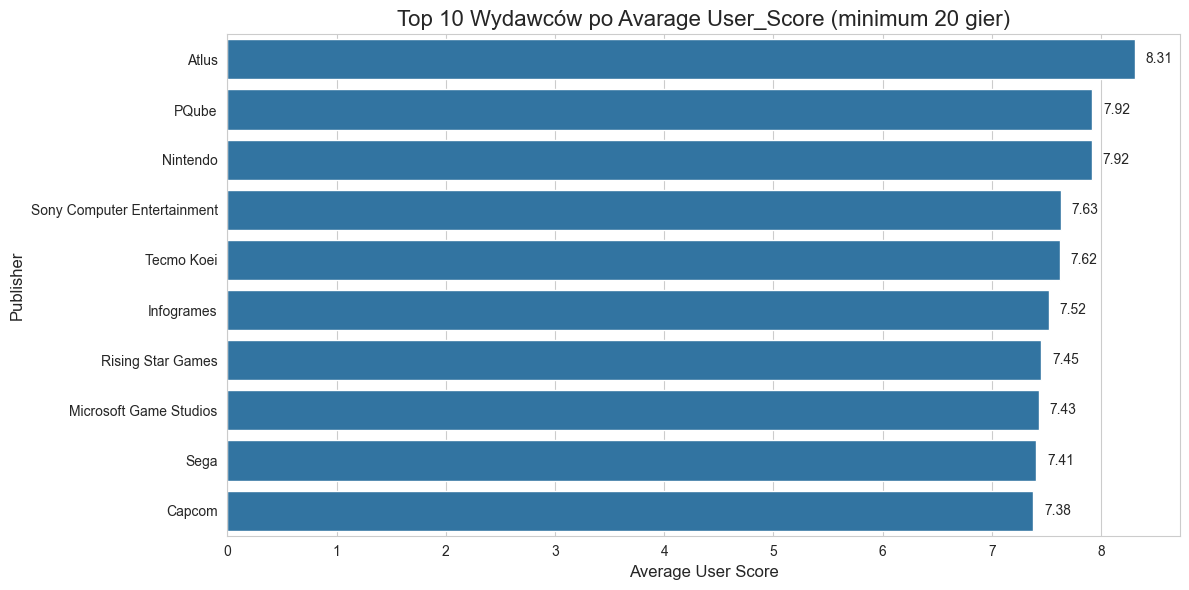

In [277]:
publisher_stats = projectData_cleaned.groupby('Publisher').agg(
    avg_user_score=('User_Score', 'mean'),
    game_count=('Publisher', 'count')
).reset_index()

#  wydawcy, którzy wydali co najmniej 20 gier
top_publishers_filtered = publisher_stats[publisher_stats['game_count'] >= 20]


top_publishers_sorted = top_publishers_filtered.sort_values(by='avg_user_score', ascending=False).head(10)


top_publishers_sorted = top_publishers_sorted.reset_index(drop=True)


plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=top_publishers_sorted,
    x='avg_user_score',
    y='Publisher',

)


plt.title('Top 10 Wydawców po Avarage User_Score (minimum 20 gier)', fontsize=16)
plt.xlabel('Average User Score', fontsize=12)
plt.ylabel('Publisher', fontsize=12)

for i, row in top_publishers_sorted.iterrows():
    plt.text(
        row['avg_user_score'] + 0.1,  
        i,
        f"{row['avg_user_score']:.2f}",
        va='center', fontsize=10
    )

plt.tight_layout()
plt.show()


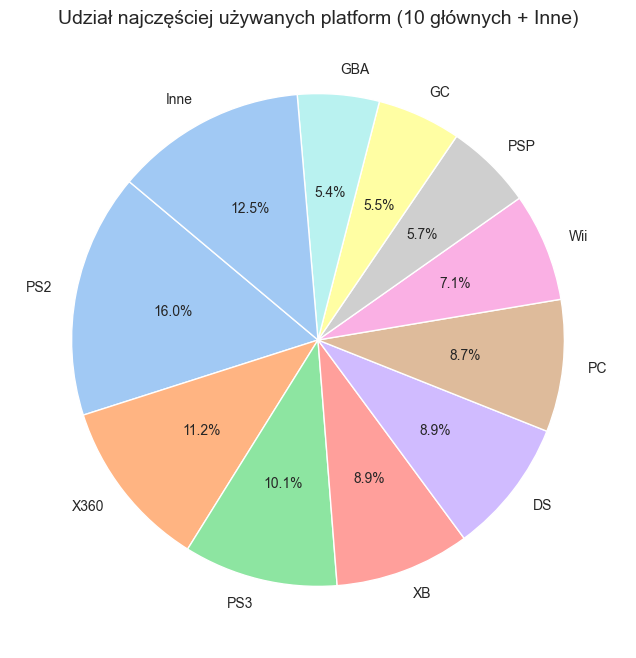

In [278]:
projectData_cleaned = projectData_selected.dropna()

platform_counts = projectData_cleaned['Platform'].value_counts()



# Wybór 10 najpopularniejszych platform
top_10_platforms = platform_counts.head(10)

# Suma dla reszty platform
other_count = platform_counts.iloc[10:].sum()


platform_labels = list(top_10_platforms.index) + ['Inne']
platform_sizes = list(top_10_platforms.values) + [other_count]


plt.figure(figsize=(8, 8))
plt.pie(
    platform_sizes,
    labels=platform_labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)
plt.title('Udział najczęściej używanych platform (10 głównych + Inne)', fontsize=14)
plt.show()




-Wykres pokazuje, że najwięcej gier jest dostępnych na platformach takich jak PS2, PS3, XBOX360.

Wnioski: Rynek gier jest zdominowany przez kilka głównych platform, podczas inne mają marginalne znaczenie, lecz są to starsze konsole wiec nie sa one aktualnie w uzytku.

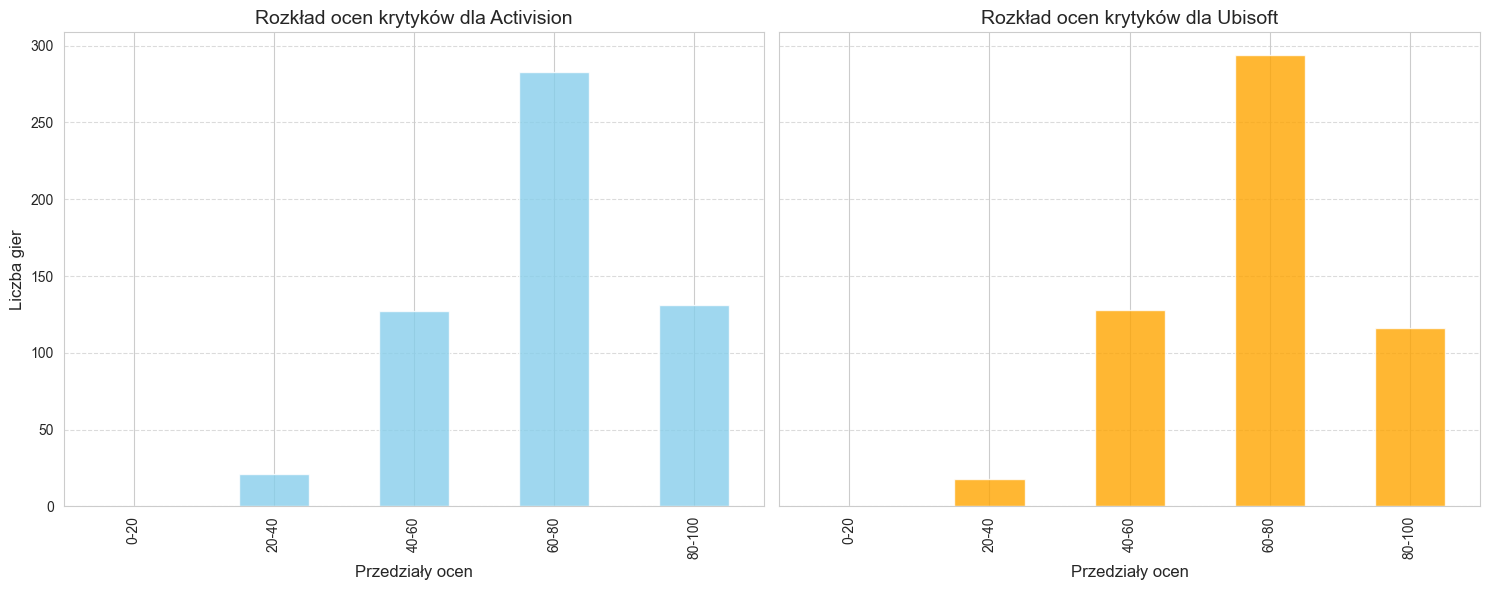

In [279]:
# Określenie przedziałów dla grupowania Critic_Score
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100']


ea_data = projectData_cleaned[projectData_cleaned['Publisher'] == 'Activision'].copy()
ubisoft_data = projectData_cleaned[projectData_cleaned['Publisher'] == 'Ubisoft'].copy()

#
ea_data['Critic_Score_Group'] = pd.cut(ea_data['Critic_Score'], bins=bins, labels=labels, include_lowest=True)
ea_grouped = ea_data['Critic_Score_Group'].value_counts().sort_index()


ubisoft_data['Critic_Score_Group'] = pd.cut(ubisoft_data['Critic_Score'], bins=bins, labels=labels, include_lowest=True)
ubisoft_grouped = ubisoft_data['Critic_Score_Group'].value_counts().sort_index()


fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Wykres dla Activision
ea_grouped.plot(kind='bar', ax=axes[0], color='skyblue', alpha=0.8)
axes[0].set_title('Rozkład ocen krytyków dla Activision', fontsize=14)
axes[0].set_xlabel('Przedziały ocen', fontsize=12)
axes[0].set_ylabel('Liczba gier', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Wykres dla Ubisoft
ubisoft_grouped.plot(kind='bar', ax=axes[1], color='orange', alpha=0.8)
axes[1].set_title('Rozkład ocen krytyków dla Ubisoft', fontsize=14)
axes[1].set_xlabel('Przedziały ocen', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


-Większość gier Activision i Ubisoft otrzymuje oceny krytyków w przedziale 60-90/100.

-Nieliczne gry mają oceny skrajnie niskie  lub bardzo wysokie.

-Obie firmy utrzymują względnie stabilny poziom jakości, choć rzadko osiągają wybitne wyniki.

# Źródła danych
1. Kaggle (2016). *Video Game Sales with Ratings*, https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings/data (dostęp: 20.04.2025).
2. Wykorzystane biblioteki: pandas, matplotlib, seaborn